In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import seaborn as sns

import Window_Function
import HERA_hack_FG
import pspec
import make_universe

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['ytick.labelsize']=24
plt.rcParams['xtick.labelsize']=24



%load_ext autoreload
%autoreload 2

In [10]:
ps= np.asarray([[1.00000000e-04, 1.04737090e-04, 1.09698580e-04, 1.14895100e-04,
       1.20337784e-04, 1.26038293e-04, 1.32008840e-04, 1.38262217e-04,
       1.44811823e-04, 1.51671689e-04, 1.58856513e-04, 1.66381689e-04,
       1.74263339e-04, 1.82518349e-04, 1.91164408e-04, 2.00220037e-04,
       2.09704640e-04, 2.19638537e-04, 2.30043012e-04, 2.40940356e-04,
       2.52353917e-04, 2.64308149e-04, 2.76828663e-04, 2.89942285e-04,
       3.03677112e-04, 3.18062569e-04, 3.33129479e-04, 3.48910121e-04,
       3.65438307e-04, 3.82749448e-04, 4.00880633e-04, 4.19870708e-04,
       4.39760361e-04, 4.60592204e-04, 4.82410870e-04, 5.05263107e-04,
       5.29197874e-04, 5.54266452e-04, 5.80522552e-04, 6.08022426e-04,
       6.36824994e-04, 6.66991966e-04, 6.98587975e-04, 7.31680714e-04,
       7.66341087e-04, 8.02643352e-04, 8.40665289e-04, 8.80488358e-04,
       9.22197882e-04, 9.65883224e-04, 1.01163798e-03, 1.05956018e-03,
       1.10975250e-03, 1.16232247e-03, 1.21738273e-03, 1.27505124e-03,
       1.33545156e-03, 1.39871310e-03, 1.46497140e-03, 1.53436841e-03,
       1.60705282e-03, 1.68318035e-03, 1.76291412e-03, 1.84642494e-03,
       1.93389175e-03, 2.02550194e-03, 2.12145178e-03, 2.22194686e-03,
       2.32720248e-03, 2.43744415e-03, 2.55290807e-03, 2.67384162e-03,
       2.80050389e-03, 2.93316628e-03, 3.07211300e-03, 3.21764175e-03,
       3.37006433e-03, 3.52970730e-03, 3.69691271e-03, 3.87203878e-03,
       4.05546074e-03, 4.24757155e-03, 4.44878283e-03, 4.65952567e-03,
       4.88025158e-03, 5.11143348e-03, 5.35356668e-03, 5.60716994e-03,
       5.87278661e-03, 6.15098579e-03, 6.44236351e-03, 6.74754405e-03,
       7.06718127e-03, 7.40196000e-03, 7.75259749e-03, 8.11984499e-03,
       8.50448934e-03, 8.90735464e-03, 9.32930403e-03, 9.77124154e-03,
       1.02341140e-02, 1.07189132e-02, 1.12266777e-02, 1.17584955e-02,
       1.23155060e-02, 1.28989026e-02, 1.35099352e-02, 1.41499130e-02,
       1.48202071e-02, 1.55222536e-02, 1.62575567e-02, 1.70276917e-02,
       1.78343088e-02, 1.86791360e-02, 1.95639834e-02, 2.04907469e-02,
       2.14614120e-02, 2.24780583e-02, 2.35428641e-02, 2.46581108e-02,
       2.58261876e-02, 2.70495973e-02, 2.83309610e-02, 2.96730241e-02,
       3.10786619e-02, 3.25508860e-02, 3.40928507e-02, 3.57078596e-02,
       3.73993730e-02, 3.91710149e-02, 4.10265811e-02, 4.29700470e-02,
       4.50055768e-02, 4.71375313e-02, 4.93704785e-02, 5.17092024e-02,
       5.41587138e-02, 5.67242607e-02, 5.94113398e-02, 6.22257084e-02,
       6.51733960e-02, 6.82607183e-02, 7.14942899e-02, 7.48810386e-02,
       7.84282206e-02, 8.21434358e-02, 8.60346442e-02, 9.01101825e-02,
       9.43787828e-02, 9.88495905e-02, 1.03532184e-01, 1.08436597e-01,
       1.13573336e-01, 1.18953407e-01, 1.24588336e-01, 1.30490198e-01,
       1.36671636e-01, 1.43145894e-01, 1.49926843e-01, 1.57029012e-01,
       1.64467618e-01, 1.72258597e-01, 1.80418641e-01, 1.88965234e-01,
       1.97916687e-01, 2.07292178e-01, 2.17111795e-01, 2.27396575e-01,
       2.38168555e-01, 2.49450814e-01, 2.61267523e-01, 2.73644000e-01,
       2.86606762e-01, 3.00183581e-01, 3.14403547e-01, 3.29297126e-01,
       3.44896226e-01, 3.61234270e-01, 3.78346262e-01, 3.96268864e-01,
       4.15040476e-01, 4.34701316e-01, 4.55293507e-01, 4.76861170e-01,
       4.99450512e-01, 5.23109931e-01, 5.47890118e-01, 5.73844165e-01,
       6.01027678e-01, 6.29498899e-01, 6.59318827e-01, 6.90551352e-01,
       7.23263390e-01, 7.57525026e-01, 7.93409667e-01, 8.30994195e-01,
       8.70359136e-01, 9.11588830e-01, 9.54771611e-01, 1.00000000e+00],[  174.56164417,   182.53109135,   190.8640145 ,   199.57691816,
         208.68705473,   218.21246625,   228.17200496,   238.58535713,
         249.47309161,   260.85670307,   272.75864676,   285.20235065,
         298.21227285,   311.81394985,   326.03404629,   340.90041505,
         356.44214748,   372.68957019,   389.67427513,   407.42922396,
         425.98880463,   445.38887544,   465.66678429,   486.86145702,
         509.01341834,   532.16488466,   556.35978616,   581.64385173,
         608.06457041,   635.67129319,   664.51532821,   694.65000658,
         726.13061875,   759.01441315,   793.36077845,   829.2312671 ,
         866.68962597,   905.80165929,   946.63544627,   989.26127858,
        1033.75176445,  1080.18153022,  1128.62744166,  1179.16854456,
        1231.88614862,  1286.8637096 ,  1344.1868307 ,  1403.94300221,
        1466.22141754,  1531.11315747,  1598.71095209,  1669.10912769,
        1742.40299395,  1818.68905212,  1898.06410824,  1980.62560168,
        2066.47060658,  2155.69604226,  2248.39735205,  2344.66861568,
        2444.60178688,  2548.28633761,  2655.80823272,  2767.24898984,
        2882.68580547,  3002.19038188,  3125.82837291,  3253.65708555,
        3385.72610693,  3522.07522058,  3662.73454746,  3807.72193045,
        3957.04316169,  4110.6900796 ,  4268.64007774,  4430.85299177,
        4597.27028035,  4767.81399857,  4942.38516037,  5120.86123823,
        5303.09237584,  5488.90276019,  5678.08648586,  5870.40941403,
        6065.60534176,  6263.37428689,  6463.36325002,  6665.18195408,
        6868.44161563,  7072.73429612,  7277.51126184,  7482.09928906,
        7685.82626967,  7888.0351608 ,  8088.03987631,  8285.12678289,
        8478.5138178 ,  8667.29683194,  8850.51311168,  9027.12931771,
        9196.06752366,  9356.18744313,  9506.3132547 ,  9645.21840799,
        9771.64935322,  9884.28670752,  9981.77472549, 10062.74753911,
       10125.8437687 , 10169.72629518, 10193.0827588 , 10194.68340183,
       10173.38265823, 10128.1832776 , 10058.25895246,  9962.99947152,
        9842.08111498,  9695.46372898,  9523.52929248,  9327.011966  ,
        9107.18430063,  8865.74252547,  8604.95025957,  8327.55923312,
        8036.80913707,  7736.49719373,  7430.57935063,  7123.40749683,
        6819.29046827,  6523.10976631,  6239.01268269,  5969.59629294,
        5716.99542587,  5485.02443583,  5277.17542952,  5091.18607052,
        4922.34421961,  4766.49313289,  4619.41583966,  4475.83307781,
        4329.59186024,  4173.44428564,  3998.73304295,  3800.00464328,
        3576.90452803,  3334.68175954,  3083.38290344,  2834.82733185,
        2600.68055806,  2391.90528598,  2217.19253879,  2080.28855545,
        1976.99925113,  1895.02972155,  1817.55273898,  1728.54360803,
        1618.43704013,  1487.96600941,  1347.39326732,  1213.17382917,
        1102.60291261,  1022.9216507 ,   966.15553263,   916.62873636,
         858.29405797,   784.72326011,   705.71531069,   636.60772107,
         585.75779511,   547.93442457,   510.0301037 ,   464.88183208,
         418.82964804,   380.92482953,   351.76567142,   323.79757516,
         293.65055474,   265.85228967,   243.09469264,   222.28177678,
         201.46193026,   182.75699106,   166.47453679,   151.02773002,
         136.80374459,   124.15758207,   112.42875379,   101.75311008,
          92.09543971,    83.24524734,    75.2367541 ,    67.95958416,
          61.34380381,    55.33725006,    49.89061768,    44.95746367,
          40.49310566,    36.4549511 ,    32.80401469,    29.50471442]])

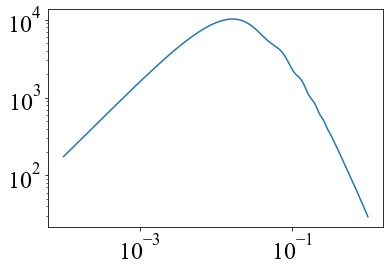

In [12]:
plt.loglog(ps[0],ps[1])

In [14]:
################### MAKE UNIVERSE STUFF ################
Ly = 100
Lx = 100

make_uni = make_universe.universe(ps,50,50,Ly,Lx, mean = 0) #100 Mpc by 100Mpc

universe = make_uni.make_2D_universe()



/Users/hannahfronenberg/Documents/GitHub/Hannah-Msc/HERA Hack/make_universe.py:90: RuntimeWarning: invalid value encountered in sqrt
  a = float(np.random.normal(0, stdev)) #for discrete, need to interp
